# Problem Statement

Cardiovascular diseases are responsible for approximately 17.9 million deaths annually, accounting for 32% of all global deaths. Of these, 85% are due to heart attacks and strokes the leading global cause of death. Understanding their causes and creating effective systems to predict heart attacks are crucial. The following data highlights factors that may influence cardiovascular health 

### Data set Description
The dataset, available on the UC Irvine Machine Learning Repository website, is licensed under a Creative Commons Attribution 4.0 International. It contains patient information, comprising over 303 records and 13 attributes. The aim is to predict the risk of future coronary heart disease (CHD) in patients. 

link : https://archive.ics.uci.edu/dataset/45/heart+disease

Variable Information
Before diving into the analysis, let's understand the variables in our dataset:

1. Age (age): Patient's age in years.

2. Sex (sex): Gender of the patient. Values: 1 = Male, 0 = Female

3. Chest Pain Type (cp): Type of chest pain experienced. Values: 1 = Typical angina, 2 = Atypical angina, 3 = Non-anginal pain,    4 = Asymptomatic

4. Resting Blood Pressure (trestbps): Blood pressure on admission in mm Hg.

5. Serum Cholesterol (chol): Serum cholesterol level in mg/dl.

6. Fasting Blood Sugar (fbs): Fasting blood sugar level. Values: 1 = >120 mg/dl, 0 = <=120 mg/dl

7. Resting Electrocardiographic Results (restecg): Results of resting electrocardiogram. Values: 0 = Normal, 1 = ST-T wave    
   abnormality, 2 = Probable or definite left ventricular hypertrophy

8. Maximum Heart Rate Achieved (thalach): Maximum heart rate during examination.

9. Exercise-Induced Angina (exang): Presence of exercise-induced angina. Values: 1 = Yes, 0 = No

10. ST Depression Induced by Exercise Relative to Rest (oldpeak): ST depression induced by exercise relative to rest.

11. Slope of the Peak Exercise ST Segment (slope): Slope of the peak exercise ST segment. Values: 1 = Upsloping, 2 = Flat, 3 = Downsloping

12. Number of Major Vessels Colored by Fluoroscopy (ca): Number of major vessels colored by fluoroscopy. A higher count may indicate a greater degree of vessel involvement or narrowing, which can be associated with more advanced stages of coronary artery disease.

13. Thalassemia (thal): Type of thalassemia. Values: 3 = Normal, 6 = Fixed defect, 7 = Reversible defect

14. Target: 1 or 0 

### Task to be performed:

1.	Preliminary analysis:
    
    a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, 
    duplicates, etc.
    
    b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy


2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:
    
    a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the 
    data
    
    b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate 
    tools, such as count plot 
    
    c.	Study the occurrence of CVD across the Age category
    
    d.	Study the composition of all patients with respect to the Sex category
    
    e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
    
    f.	Describe the relationship between cholesterol levels and a target variable
      
    j.	Use a pair plot to understand the relationship between all the given variables


3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection


# Importing Libraries

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# Define color palette for plot
palette = ["#87CEEB", "#FFA07A"]

# Step 1 - Preliminary Analysis

###  Loading dataset

In [200]:
inp1 = pd.read_excel("F://Simplilearn//03 PGDS Machine Learning//Projects//Project 2_Health Care//1645792390_cep1_dataset.xlsx")
inp1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Examini Shape, Size, Statisical Data and Data Types

In [201]:
# Examine the shape
print('Shape of data :',inp1.shape)

Shape of data : (303, 14)


There are 303 observations and 14 features in the data set

In [202]:
# Examine the size of the data set
print('Size of the data:', inp1.size)

Size of the data: 4242


In [203]:
#Examine the statistical data
print('Statistical data analysis :\n',inp1.describe().T)

Statistical data analysis :
           count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal     

In [204]:
# Check the column-wise info of the dataframe
inp1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


1. All are int or float type of data types
2. There are no missing values in the data set.

### Examinu Null and Duplicates

In [205]:
# Check for missing values
inp1.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values in the data set. No treat ment is requried.

In [206]:
#Check duplicates
inp1.duplicated().sum()

1

There is one duplicate record in the data set

In [207]:
#Idntifying the duplicate record from the data set
inp1[inp1.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [208]:
# removing the duplicate.
inp1.drop_duplicates(inplace=True)

In [209]:
#Checking duplicates if there any 
inp1.duplicated().sum()

0

There no further duplicates in the data set.

# Step 2 - Prepare a report about the data explaining the distribution of the disease

    a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the 
    data
    
    b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate 
    tools, such as count plot 
    
    c.	Study the occurrence of CVD across the Age category
    
    d.	Study the composition of all patients with respect to the Sex category
    
    e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
    
    f.	Describe the relationship between cholesterol levels and a target variable
    
    g.	State what relationship exists between peak exercising and the occurrence of a heart attack
    
    h.	Check if thalassemia is a major cause of CVD
    
    i.	List how the other factors determine the occurrence of CVD
    
    j.	Use a pair plot to understand the relationship between all the given variables

###  Feature Renaming

In [210]:
# Define a dictionary with the new column names
new_column_names = {
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPainType',
    'trestbps': 'RestingBloodPressure',
    'chol': 'SerumCholesterol',
    'fbs': 'FastingBloodSugar',
    'restecg': 'RestingECG',
    'thalach': 'MaxHeartRate',
    'exang': 'ExerciseInducedAngina',
    'oldpeak': 'STDepression',
    'slope': 'SlopeSTSegment',
    'ca': 'NumMajorVessels',
    'thal': 'Thalassemia',
    'num': 'HeartDiseaseDiagnosis'
}

# Rename the columns using the dictionary
inp1.rename(columns=new_column_names, inplace=True)

# Print first 5 rows of our data
inp1.head()

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,SlopeSTSegment,NumMajorVessels,Thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Categorical Encoding

Substitute numerical values in categorical features with their respective detailed descriptions. 

In [211]:
print(inp1["SlopeSTSegment"].value_counts())

SlopeSTSegment
2    141
1    140
0     21
Name: count, dtype: int64


In [212]:
# Define the mapping for each categorical variable
CPType_mapping = {0: 'TypicalAngina', 1: 'AtypicalAngina', 2: 'NonAnginal pain', 3: 'Asymptomatic'}
Thal_mapping = {0.0:"Normal",2.0: 'Normal', 1.0: 'Fixed defect', 3.0: 'Reversible defect'}
Slope_mapping = {0: 'Upsloping', 1: 'Flat', 2: 'Downsloping'}


# Replace the values in the original DataFrame
inp1['ChestPainType'] = inp1['ChestPainType'].map(CPType_mapping)
inp1['Thalassemia'] = inp1['Thalassemia'].map(Thal_mapping)
inp1['SlopeSTSegment'] = inp1['SlopeSTSegment'].map(Slope_mapping)
inp1.head()

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,SlopeSTSegment,NumMajorVessels,Thalassemia,target
0,63,1,Asymptomatic,145,233,1,0,150,0,2.3,Upsloping,0,Fixed defect,1
1,37,1,NonAnginal pain,130,250,0,1,187,0,3.5,Upsloping,0,Normal,1
2,41,0,AtypicalAngina,130,204,0,0,172,0,1.4,Downsloping,0,Normal,1
3,56,1,AtypicalAngina,120,236,0,1,178,0,0.8,Downsloping,0,Normal,1
4,57,0,TypicalAngina,120,354,0,1,163,1,0.6,Downsloping,0,Normal,1


In [213]:
inp1.isnull().sum()

Age                      0
Sex                      0
ChestPainType            0
RestingBloodPressure     0
SerumCholesterol         0
FastingBloodSugar        0
RestingECG               0
MaxHeartRate             0
ExerciseInducedAngina    0
STDepression             0
SlopeSTSegment           0
NumMajorVessels          0
Thalassemia              0
target                   0
dtype: int64

### 2. a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [214]:
# Statisitcal Data
print(" The stastical Data is: \n", inp1.describe().T)

 The stastical Data is: 
                        count        mean        std    min     25%    50%  \
Age                    302.0   54.420530   9.047970   29.0   48.00   55.5   
Sex                    302.0    0.682119   0.466426    0.0    0.00    1.0   
RestingBloodPressure   302.0  131.602649  17.563394   94.0  120.00  130.0   
SerumCholesterol       302.0  246.500000  51.753489  126.0  211.00  240.5   
FastingBloodSugar      302.0    0.149007   0.356686    0.0    0.00    0.0   
RestingECG             302.0    0.526490   0.526027    0.0    0.00    1.0   
MaxHeartRate           302.0  149.569536  22.903527   71.0  133.25  152.5   
ExerciseInducedAngina  302.0    0.327815   0.470196    0.0    0.00    0.0   
STDepression           302.0    1.043046   1.161452    0.0    0.00    0.8   
NumMajorVessels        302.0    0.718543   1.006748    0.0    0.00    0.0   
target                 302.0    0.543046   0.498970    0.0    0.00    1.0   

                          75%    max  
Age       

1. Age Feature - Minimum age is 29 and max age is 77 
2. Sex Feature - It is a categorical feture which is having values 0 and 1.
   Mean  - 54.42. 
3. CP Feature - It is a categorical features , having values 0, 1, 2 and 3.
4. fbs Feature - It is a categorical feture which is having values 0 and 1.
5. restecg Feature - It is a categorical feture which is having values 0,1 and 2.
6. exang Feature - It is a categorical feture which is having values 0 and 1.
7. slopeg Feature - It is a categorical feture which is having values 0,1  and 2.
8. ca Feature - It is a categorical feture which is having values 0,1,2,3 and 4.
9. thal - It is a categorical feture which is having values 0,1,2, and 3.

### 2.b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot

In [215]:
print(inp1.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBloodPressure',
       'SerumCholesterol', 'FastingBloodSugar', 'RestingECG', 'MaxHeartRate',
       'ExerciseInducedAngina', 'STDepression', 'SlopeSTSegment',
       'NumMajorVessels', 'Thalassemia', 'target'],
      dtype='object')


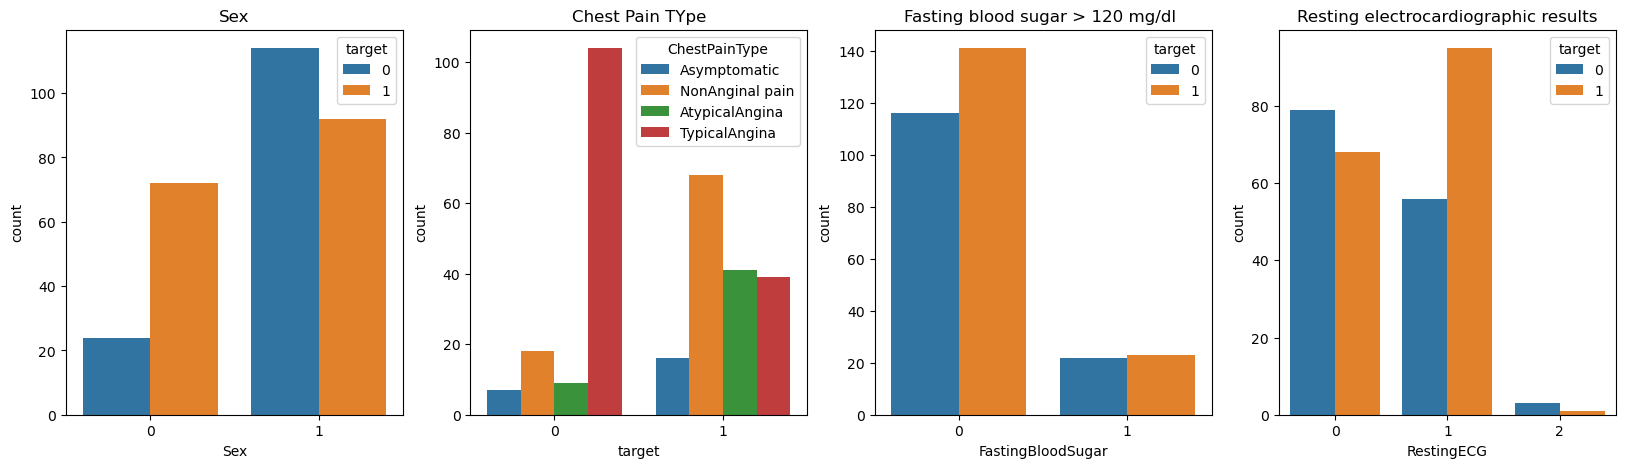

In [216]:
import seaborn as sns

plt.figure(figsize=(20,5))

plt.subplot(1,4,1)   
sns.countplot(x = 'Sex', hue = "target", data = inp1)
plt.title("Sex")

plt.subplot(1,4,2)
sns.countplot(x ='target', hue = "ChestPainType", data = inp1)
plt.title("Chest Pain TYpe")

plt.subplot(1,4,3)
sns.countplot(x ='FastingBloodSugar', hue = "target", data = inp1)
plt.title("Fasting blood sugar > 120 mg/dl ")

plt.subplot(1,4,4)
sns.countplot(x ='RestingECG', hue = "target", data = inp1)
plt.title("Resting electrocardiographic results")



plt.show()

 - Both genders are significantly affected by heart disease.
 - Heat diseases are occurring due to different types of chest pain: Asymptomatic, Non-Anginal Pain, Atypical Angina, and Typical Angina.
 - Regardless of fasting blood sugar levels exceeding 120 mg/dl, heart disease is still a risk.
 - Heart diseases have a greater impact on both normal (0) and abnormal (1) ECG waves.

 


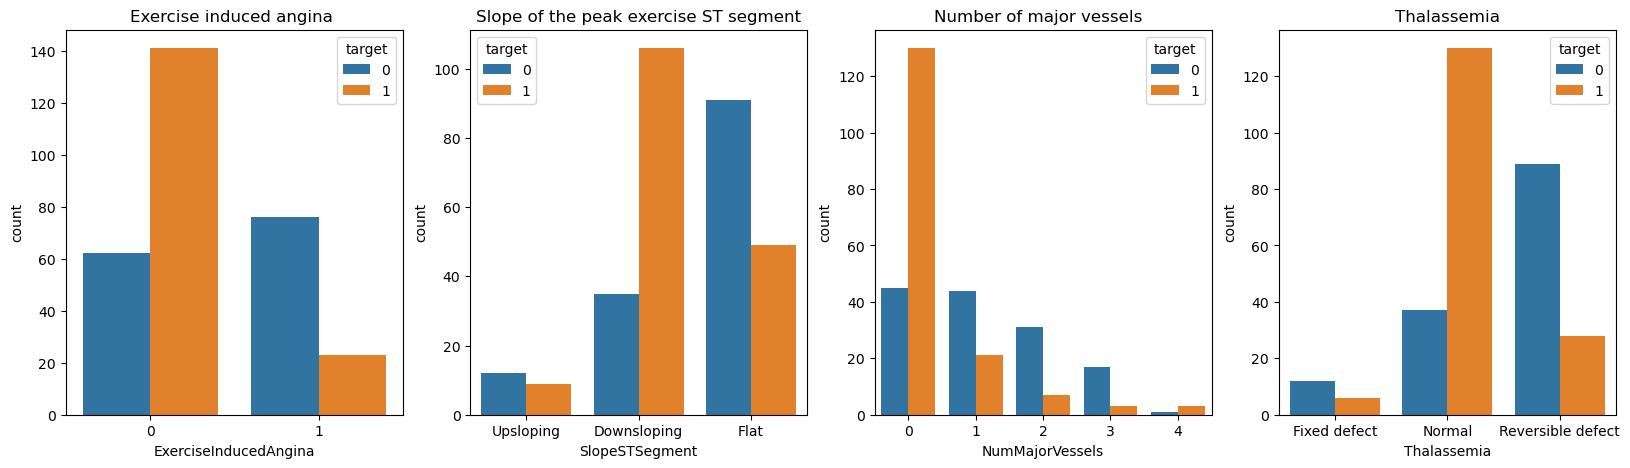

In [217]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)   
sns.countplot(x = 'ExerciseInducedAngina', hue = "target", data = inp1)
plt.title("Exercise induced angina ")

plt.subplot(1,4,2)
sns.countplot(x ='SlopeSTSegment', hue = "target", data = inp1)
plt.title("Slope of the peak exercise ST segment")

plt.subplot(1,4,3)
sns.countplot(x ='NumMajorVessels', hue = "target", data = inp1)
plt.title("Number of major vessels  ")

plt.subplot(1,4,4)
sns.countplot(x ='Thalassemia', hue = "target", data = inp1)
plt.title("Thalassemia")

plt.show()

- Lack of exercise leads to an increased risk of heart diseases.
- The slope of the peak exercise ST segment, with values of 1 for Upsloping and 2 for Flat, is associated with heart diseases.
- Individuals with normal thalassemia are more susceptible to heart diseases.

### 2.C Study the occurrence of CVD across the Age category

In [218]:
# Custom function for age classification
def classify_age(age):
    if age < 12:
        return 'Child'
    elif 13 <= age <= 19:
        return 'Teen'
    elif 20 <= age <= 25:
        return 'Young Adult'
    elif 26 <= age <= 35:
        return 'Adult'
    elif 36 <= age <= 60:
        return 'Mid-Age'
    else:
        return 'Senior'

# Apply the custom function to create a new 'Age Category' column
inp1['Age_Category'] = inp1['Age'].apply(classify_age)
inp1.head()

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,SlopeSTSegment,NumMajorVessels,Thalassemia,target,Age_Category
0,63,1,Asymptomatic,145,233,1,0,150,0,2.3,Upsloping,0,Fixed defect,1,Senior
1,37,1,NonAnginal pain,130,250,0,1,187,0,3.5,Upsloping,0,Normal,1,Mid-Age
2,41,0,AtypicalAngina,130,204,0,0,172,0,1.4,Downsloping,0,Normal,1,Mid-Age
3,56,1,AtypicalAngina,120,236,0,1,178,0,0.8,Downsloping,0,Normal,1,Mid-Age
4,57,0,TypicalAngina,120,354,0,1,163,1,0.6,Downsloping,0,Normal,1,Mid-Age


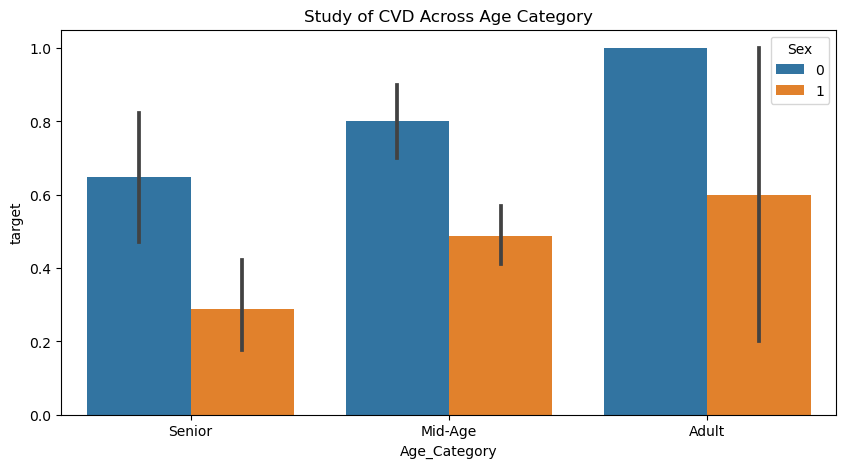

In [219]:
plt.figure(figsize=(10,5))
sns.barplot(x="Age_Category",y="target",hue="Sex",data=inp1)
plt.title("Study of CVD Across Age Category")
plt.show()

- Heart diseases affect individuals across all age groups: Adults (26-35), Mid-Age (36-60), and Seniors (over 60). Interestingly, Adults and Mid-Age individuals experience a higher incidence of heart diseases compared to Seniors.

In [220]:
#Droping Age Category after analsysis
inp1.drop('Age_Category',inplace = True,axis=1)

In [221]:
inp1.head()

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,SlopeSTSegment,NumMajorVessels,Thalassemia,target
0,63,1,Asymptomatic,145,233,1,0,150,0,2.3,Upsloping,0,Fixed defect,1
1,37,1,NonAnginal pain,130,250,0,1,187,0,3.5,Upsloping,0,Normal,1
2,41,0,AtypicalAngina,130,204,0,0,172,0,1.4,Downsloping,0,Normal,1
3,56,1,AtypicalAngina,120,236,0,1,178,0,0.8,Downsloping,0,Normal,1
4,57,0,TypicalAngina,120,354,0,1,163,1,0.6,Downsloping,0,Normal,1


### 2.d d.	Study the composition of all patients with respect to the Sex category

In [222]:
inp1['Sex'].value_counts()

Sex
1    206
0     96
Name: count, dtype: int64

- There are overall 96 females and 206 males exist in the data set.

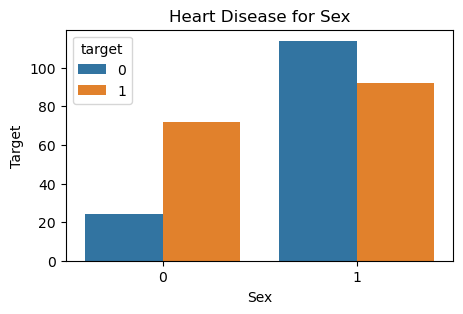

In [223]:
plt.figure(figsize=(5,3))
plt.title('Heart Disease for Sex')

# Create bar plot
sns.countplot(x="Sex",hue="target", data = inp1)

# Add labels and title
plt.xlabel('Sex')


plt.ylabel('Target')

plt.show()

- Male individuals are more frequently affected by heart disease.

### 2.e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

In [224]:
print(inp1["RestingBloodPressure"].min(),inp1["RestingBloodPressure"].max())

94 200


<Axes: xlabel='RestingBloodPressure', ylabel='count'>

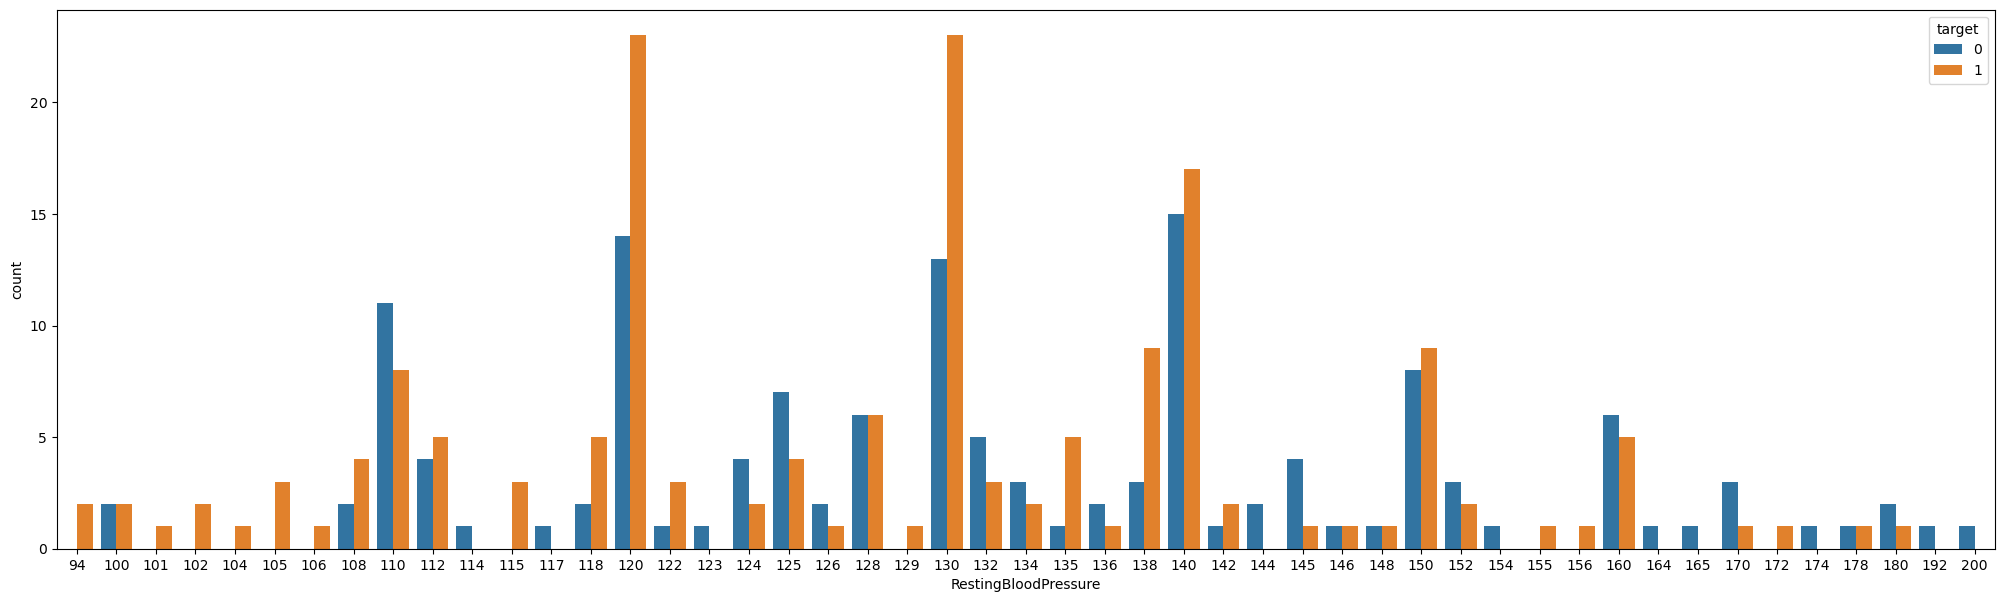

In [225]:
plt.figure(figsize=(25,7))
sns.countplot(x= 'RestingBloodPressure', data= inp1, hue='target') 

- Patients with resting blood pressure (trestbps) values of 120, 130, and 140 are observed to be highly susceptible to heart attacks.

### 2.f. Describe the relationship between cholesterol levels and a target variable

plt.figure(figsize=(16,7))
sns.distplot(inp1[inp1['target']==1]['SerumCholesterol'],kde=True,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

- High cholesterol also contributes to heart disease.

### 2.g.	Use a pair plot to understand the relationship between all the given variables

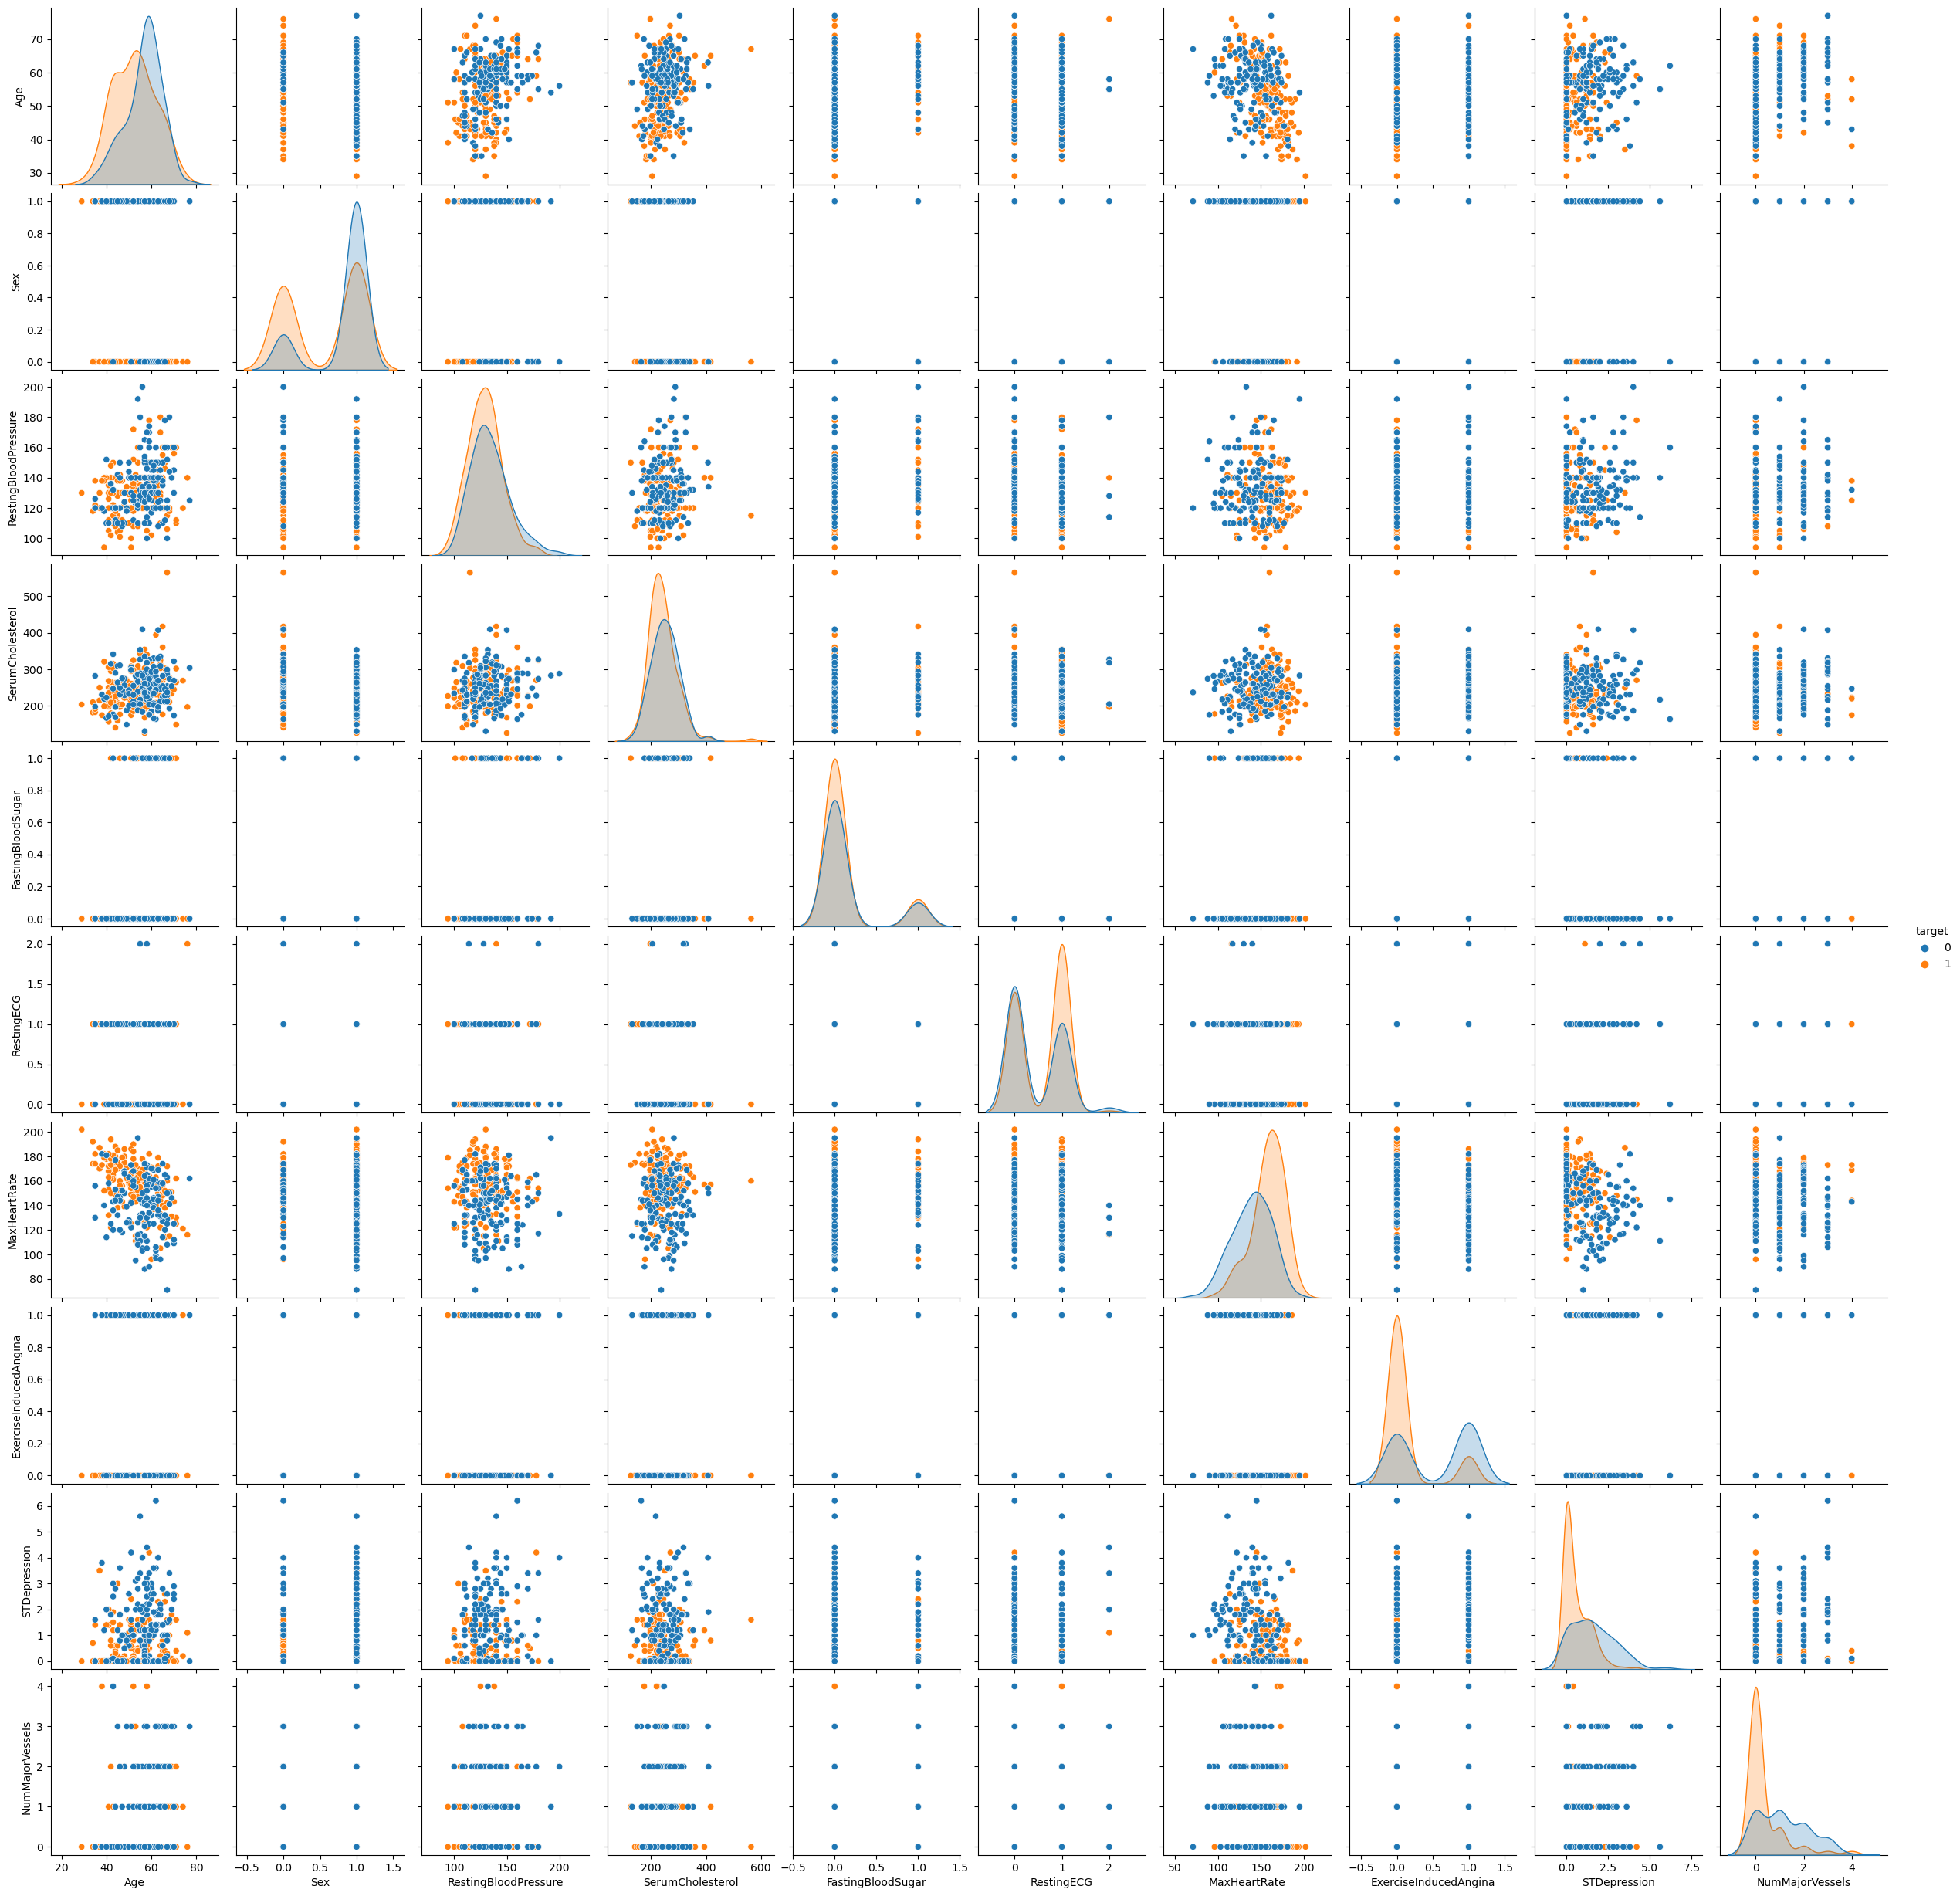

In [226]:
sns.pairplot(inp1,hue='target',kind="scatter")
plt.show()

In [227]:
inp1.head()

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,SlopeSTSegment,NumMajorVessels,Thalassemia,target
0,63,1,Asymptomatic,145,233,1,0,150,0,2.3,Upsloping,0,Fixed defect,1
1,37,1,NonAnginal pain,130,250,0,1,187,0,3.5,Upsloping,0,Normal,1
2,41,0,AtypicalAngina,130,204,0,0,172,0,1.4,Downsloping,0,Normal,1
3,56,1,AtypicalAngina,120,236,0,1,178,0,0.8,Downsloping,0,Normal,1
4,57,0,TypicalAngina,120,354,0,1,163,1,0.6,Downsloping,0,Normal,1


### Creating Dummy Variables for categorical features ChestPainType,SlopeSTSegment,Thalassemia

In [228]:
# Convert variables to appropriate data types
categorical_vars = ['ChestPainType', 'Thalassemia', 'SlopeSTSegment']
inp1[categorical_vars] = inp1[categorical_vars].astype(str)

In [229]:
# Use get_dummies and assign column names
dummies = pd.get_dummies(inp1[categorical_vars], prefix=categorical_vars,dummy_na = False, drop_first=True).astype(np.int64)
inp1 = pd.concat([inp1, dummies], axis=1)
inp1 = inp1.drop(columns=categorical_vars)
inp1.head()

,Age,Sex,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,NumMajorVessels,target,ChestPainType_AtypicalAngina,ChestPainType_NonAnginal pain,ChestPainType_TypicalAngina,Thalassemia_Normal,Thalassemia_Reversible defect,SlopeSTSegment_Flat,SlopeSTSegment_Upsloping
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,1,0,1,0,1,0,0,1
2,41,0,130,204,0,0,172,0,1.4,0,1,1,0,0,1,0,0,0
3,56,1,120,236,0,1,178,0,0.8,0,1,1,0,0,1,0,0,0
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,1,1,0,0,0


In [230]:
inp1.shape

(302, 18)

### List how the other factors determine the occurrence of CVD

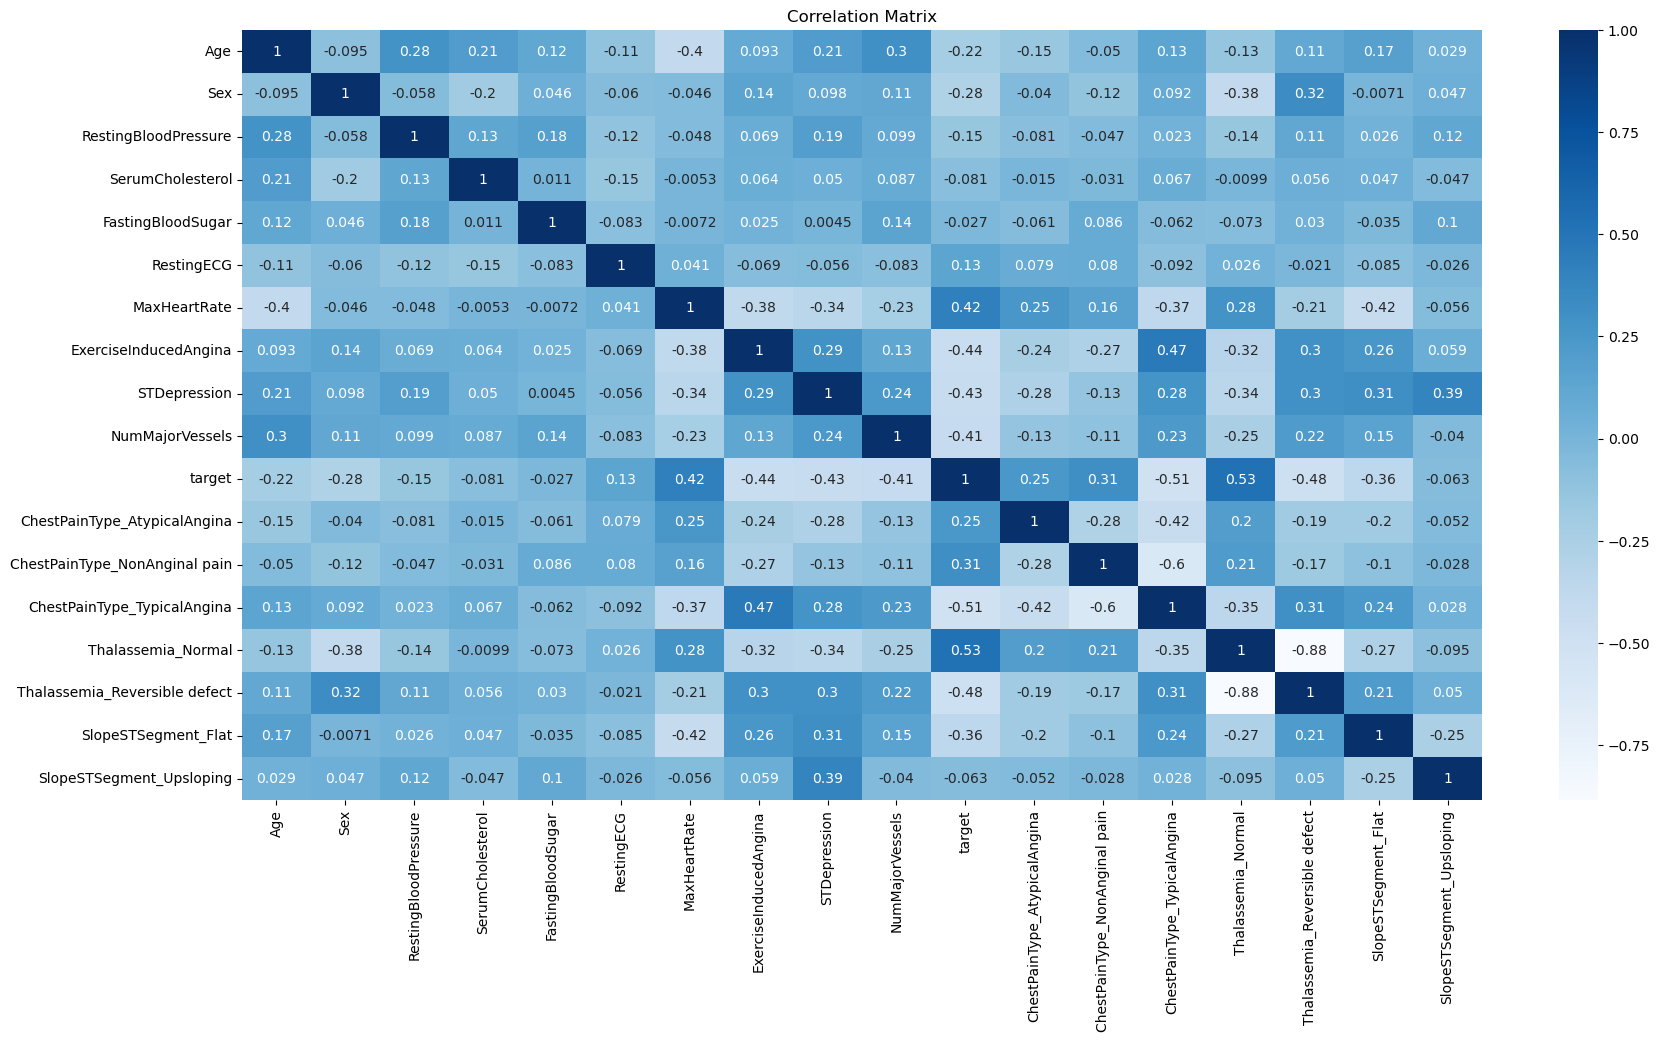

In [231]:
corr_matrix = inp1.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

# Step 3 - Build a baseline model to predict the risk of a heart attack using a logistic regression 

### Importing libraries for Logistic regression

In [232]:
# To Perfrom Hold-out Split
from sklearn.model_selection import train_test_split

#To create a model and predict
from sklearn.linear_model import LogisticRegression

#To normalize the data
from sklearn.preprocessing import StandardScaler

#To perfrom metrics 
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve,accuracy_score


#### Perform hold-out split

The dataset is divided using the train_test_split function from scikit-learn, creating separate training (X_train, y_train) and testing (X_test, y_test) sets. This method aids in model training and evaluation. With the test_size parameter set to 0.2, 80 perncnt of the data is allocated for training, while 20 percent of the data is reserved for testing the model.

In [233]:
X = inp1.drop("target",axis = 1)
y = inp1["target"]
print(X.shape,y.shape)

(302, 17) (302,)


In [234]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [235]:
print("X Train Size:",X_train.shape)
print("X Test Size :",X_test.shape)
print("y Train Size:",y_train.shape)
print("y Test  Size:",y_test.shape)

X Train Size: (241, 17)
X Test Size : (61, 17)
y Train Size: (241,)
y Test  Size: (61,)


#### Logistic Regression Model Training and Evaluation

Logistic Regression: This method is commonly used to estimate the probability that an instance belongs to a particular class. If the estimated probability exceeds 50 percent, the model predicts that the instance belongs to the positive class; otherwise, it is classified as negative. The sigmoid function is used to model the probability, and predictions are made by applying a threshold to the predicted probabilities.

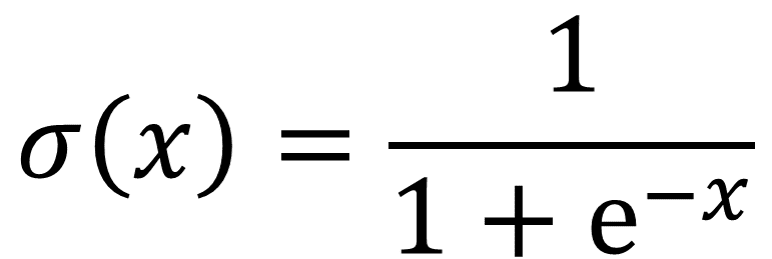

#### Model Fitting and Evaluation

In [236]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [237]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test)
# Make predictions on the training set
y_pred_train = lr_model.predict(X_train)


accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy on train set: {accuracy_train:.2f}")

accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy_test:.2f}")

Accuracy on train set: 0.86
Accuracy on test set: 0.84


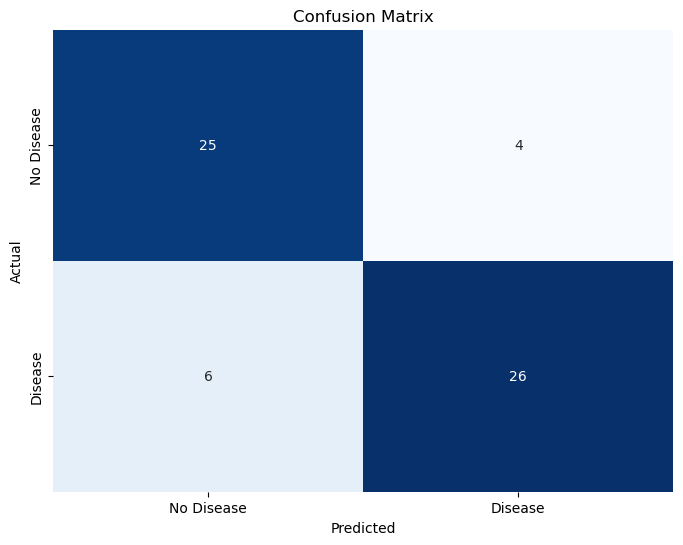

In [238]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [239]:
print(classification_report(y_test, y_pred))    #Classification Report for test set

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [240]:
inp1.head(2)

,Age,Sex,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,NumMajorVessels,target,ChestPainType_AtypicalAngina,ChestPainType_NonAnginal pain,ChestPainType_TypicalAngina,Thalassemia_Normal,Thalassemia_Reversible defect,SlopeSTSegment_Flat,SlopeSTSegment_Upsloping
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,1,0,1,0,1,0,0,1


#### Building a predictive system

In [241]:
import warnings
in_data = (57,0,140,241,0,1,123,1,0.2,1,0,1,1,0,0,1,1)

# Changing the input data into a numpy array
in_data_as_numpy_array = np.array(in_data)

# Reshaping the numpy array as we predict it
in_data_reshape = in_data_as_numpy_array.reshape(1,-1)
pred = lr_model.predict(in_data_reshape)
print(pred)

if(pred[0] == 0):
    print('The person does not have heart disease.')
else:
    print('The person has heart disease.')

[0]
The person does not have heart disease.
